In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import igraph
import itertools as itr
from enm.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from mlxtend.evaluate import permutation_test 
from enm.enm import igraph_network

In [7]:
os.chdir('../')

In [9]:
data_path = 'data/interim/pcc_prs_0713/'
with open(f'data/interim/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)



In [12]:
gc = e_pcc.graph_gc
prs_mat = e_pcc.prs_mat


In [17]:
prs_mat.flatten()

array([0.00000000e+00, 3.49343241e-01, 3.38656505e-02, ...,
       4.40855165e-07, 4.30006284e-07, 0.00000000e+00])

In [24]:
prs_vals = prs_mat[~np.eye(prs_mat.shape[0], dtype=bool)]

(array([2.6688958e+07, 8.0557000e+04, 3.3020000e+04, 1.9222000e+04,
        1.1978000e+04, 7.6740000e+03, 4.4860000e+03, 2.6560000e+03,
        1.7570000e+03, 9.8300000e+02, 7.0200000e+02, 5.3800000e+02,
        5.0300000e+02, 4.8100000e+02, 3.3900000e+02, 3.0300000e+02,
        2.4100000e+02, 2.1100000e+02, 1.9600000e+02, 1.1200000e+02,
        1.3200000e+02, 1.1400000e+02, 9.6000000e+01, 7.7000000e+01,
        7.5000000e+01, 1.5700000e+02, 1.8700000e+02, 1.9300000e+02,
        1.6600000e+02, 1.1700000e+02, 1.0400000e+02, 8.0000000e+01,
        7.6000000e+01, 7.6000000e+01, 5.9000000e+01, 5.0000000e+01,
        6.1000000e+01, 6.1000000e+01, 4.6000000e+01, 3.6000000e+01,
        3.3000000e+01, 2.3000000e+01, 2.6000000e+01, 2.9000000e+01,
        2.0000000e+01, 5.2000000e+01, 6.9000000e+01, 4.0000000e+01,
        1.5000000e+01, 1.6000000e+01, 2.9000000e+01, 2.0000000e+01,
        9.0000000e+00, 1.4000000e+01, 1.2000000e+01, 1.1000000e+01,
        1.5000000e+01, 8.0000000e+00, 1.4000000e

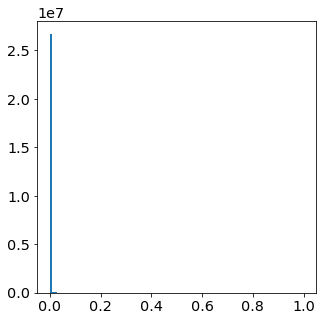

In [27]:
plt.hist(prs_vals,bins=100)

In [28]:
import seaborn as sns

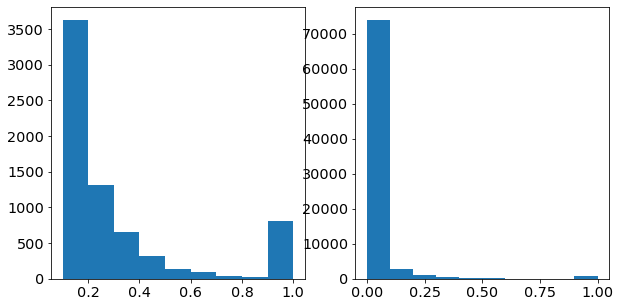

In [74]:
fig , ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist([ i for i in prs_vals if i >0.1],bins=np.arange(0.1,1.1,0.1))
ax[1].hist(prs_mat[nx.adjacency_matrix(gc).todense()==1])

plt.show()

In [60]:
len([ i for i in prs_vals if i >0.1])

7015

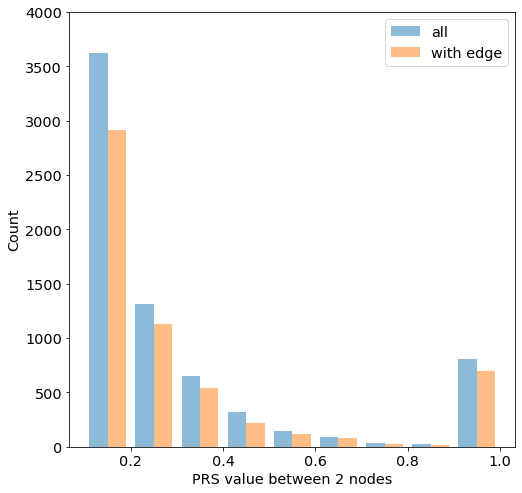

In [87]:
fig , ax = plt.subplots(figsize=(8,8))
ax.hist([[ i for i in prs_vals if i >0.1],[i for i in prs_mat[nx.adjacency_matrix(gc).todense()==1] if i > 0.1 ]]
        ,bins=np.arange(0.1,1.1,0.1), alpha=0.5,label=['all', 'with edge'])
#ax.hist([i for i in prs_mat[nx.adjacency_matrix(gc).todense()==1] if i > 0.1 ], alpha=0.5, label='with edge')
ax.set_ylim(0,4000)
ax.legend(loc='upper right')
ax.set_xlabel('PRS value between 2 nodes')
ax.set_ylabel("Count")
#ax[1].set_ylim(0,4000)
plt.savefig('reports/figures/pcc_prs_0722/PRS_distribution.png',dpi=150)
plt.show()

In [77]:
len([i for i in prs_mat[nx.adjacency_matrix(gc).todense()==1] if i > 0.1 ])

5745

In [79]:
len([ i for i in prs_vals if i >0.1])

7015

(array([268.,  40.,  14.,  13.,   0.,   0.,   0.,   0.,   0.,  16.]),
 array([0.10002535, 0.18829366, 0.27656198, 0.36483029, 0.45309861,
        0.54136692, 0.62963524, 0.71790355, 0.80617187, 0.89444018,
        0.9827085 ]),
 <a list of 10 Patch objects>)

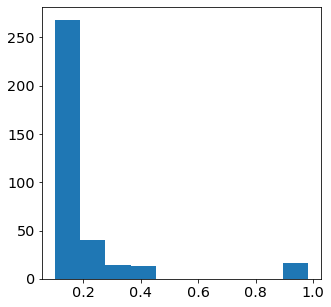

In [95]:
plt.hist([i for i in prs_mat[e_pcc.df.loc[e_pcc.df.deg>60].index].flatten() if i>0.1])


(array([43.,  3.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.10002535, 0.12928388, 0.15854241, 0.18780094, 0.21705947,
        0.246318  , 0.27557653, 0.30483506, 0.33409359, 0.36335212,
        0.39261065]),
 <a list of 10 Patch objects>)

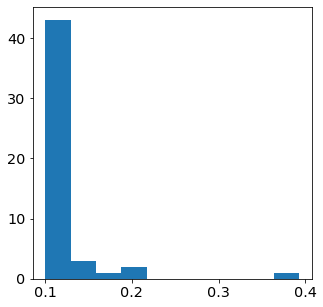

In [97]:
plt.hist([i for i in prs_mat[e_pcc.df.loc[e_pcc.df.deg>100].index].flatten() if i>0.1])
